In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('train.csv' , usecols = ['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace = True)


In [7]:
df.shape

(714, 3)

In [8]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [18]:
X_train.head()

,Age,Fare
387,36.0,13.0000
685,25.0,41.5792
20,35.0,26.0000
331,45.5,28.5000
396,31.0,7.8542


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred , y_test))

0.6223776223776224


In [13]:
np.mean(cross_val_score(clf , X , y , cv = 10 , scoring = 'accuracy'))

0.6274843505477307

## KBins

In [21]:
kbins_age = KBinsDiscretizer(n_bins = 15 , encode = 'ordinal' , strategy = 'quantile')
kbins_fare = KBinsDiscretizer(n_bins = 15 , encode = 'ordinal' , strategy = 'quantile')

In [22]:
trf = ColumnTransformer([
      ('first' , kbins_age , [0]),
      ('second' , kbins_fare , [1])
])

In [23]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf  = trf.transform(X_test)

In [24]:
output = pd.DataFrame({
        'age' : X_train['Age'],
         'age_trf' : X_train_trf[: , 0],
         'fare' : X_train['Fare'],
          'fare_trf' : X_train_trf[: , 1]
})

In [27]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [28]:
output.head()

,age,age_trf,fare,fare_trf,age_labels,fare_labels
387,36.0,10.0,13.0000,6.0,"(34.0, 37.0]","(12.35, 13.5]"
685,25.0,6.0,41.5792,12.0,"(23.0, 25.0]","(39.688, 57.979]"
20,35.0,10.0,26.0000,9.0,"(34.0, 37.0]","(25.929, 26.55]"
331,45.5,12.0,28.5000,10.0,"(42.0, 47.0]","(26.55, 30.696]"
396,31.0,9.0,7.8542,2.0,"(29.0, 31.0]","(7.775, 7.896]"


In [29]:
clf1 = DecisionTreeClassifier()

In [31]:
clf1.fit(X_train_trf , y_train)

DecisionTreeClassifier()

In [33]:
y_pred2 = clf1.predict(X_test_trf)

In [34]:
print(accuracy_score(y_pred2 , y_test))

0.6573426573426573


In [48]:
def discretizer(bins , strategy):
    kbins_age = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy)
    kbins_fare = KBinsDiscretizer(n_bins = bins , encode = 'ordinal' , strategy = strategy)
    
    trf = ColumnTransformer([
          ('fist' , kbins_age , [0]),
          ('second' , kbins_fare , [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(clf1 , X , y ,cv =10 , scoring = 'accuracy')))
    
    plt.figure(figsize = (16 ,5))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[: , 0])
    plt.title("After")
    
    
    plt.figure(figsize = (16 ,5))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[: , 1])
    plt.title('After')
    
    plt.show()

C:\Users\Parveen\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Parveen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Parveen\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Parveen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarnin

0.6372848200312988


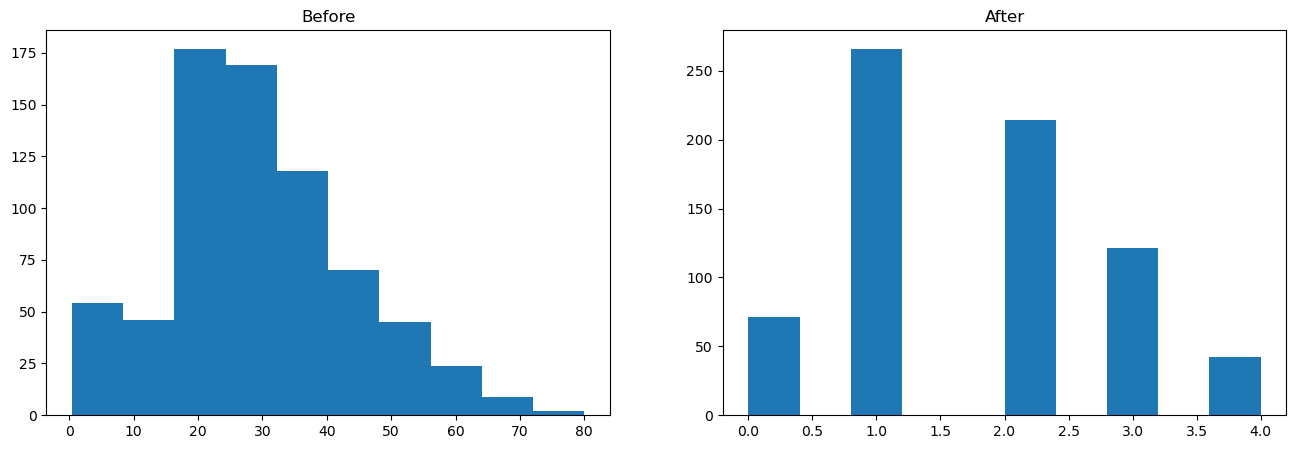

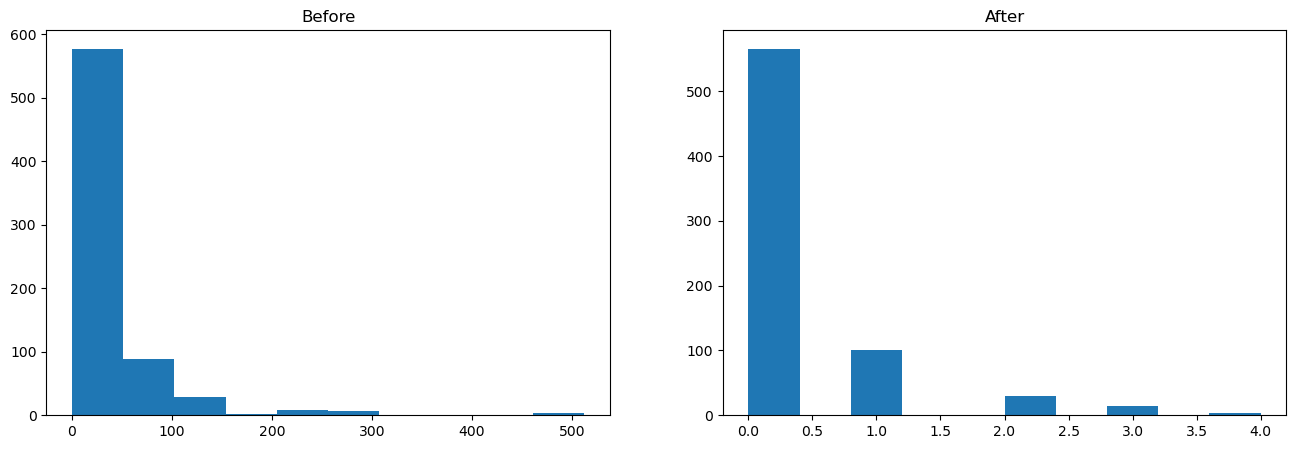

In [49]:
discretizer(5, 'kmeans')